Football Stats Profile Notebook
===

## Glossary
Principal Component Variation = Read as "Hou much (%) of the data this principal component can explain"

In [44]:
from itertools import accumulate

import matplotlib.pyplot as plt  # We will use this package to plot some data
import numpy as np
import pandas  # Library to make it eay to manipulate data in python
from sklearn import preprocessing  # This packages give us functions to scaling the data before performing PCA
from sklearn.decomposition import PCA  # PCA function from Scikit Learn


## Dataset Reading

In [45]:
STATS_FILE = "resources/brasileirao_2020_stats.csv"
METRICS = [
    # "touches",
    "passes_def",
    "passes_mid",
    "passes_att",
    "passes_forward",
    "passes_backward",
    # "passes_vertical",
    # "passes_left",
    # "passes_right",
    "passes_horizontal",
    "passes_long",
    "passes_short",
    "crosses",
    "shots",
    # "possession"
]

data = pandas.read_csv(STATS_FILE, sep=";", index_col=0).filter(METRICS, axis=1)
print(f'Data sneak peak:\n {data.head()}')
print(f'Data shape: {data.shape}')

Data sneak peak:
                       passes_def  passes_mid  passes_att  passes_forward  \
grêmio                        76         336         165             332   
santos                        91         154         104             217   
Fortaleza                     93         243         115             253   
Athletico Paranaense         181         294         104             324   
Coritiba                      87         241          88             295   

                      passes_backward  passes_horizontal  passes_long  \
grêmio                            242                576           35   
santos                            131                349           37   
Fortaleza                         197                451           64   
Athletico Paranaense              253                578           62   
Coritiba                          117                414           55   

                      passes_short  crosses  shots  
grêmio                         54

## Pre Processing

Before performing PCA we need to center and scale the data.

After centering the average value for each metric will be 0.

And after scaling, the standard deviation for the value for each metric will be 1

In [46]:
scaled_data = preprocessing.scale(data)

## Apply PCA

In [47]:
pca = PCA()

# This is where we do all the PCA math# (i.e calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)

# This is where we generate coordinates for the PCA graph (based on the loading score and the scaled data)
pca_data = pca.transform(scaled_data)

## Principal Component Variation Graph

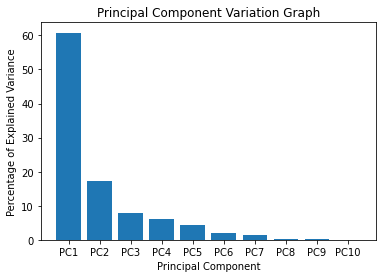

In [48]:
# Calculate the percentage variation that each PC accounts for
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Creating labels for our graph
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Principal Component Variation Graph')
plt.show()

## Principal Component Filtering
Now we are going to save all the components that account for at least 90% of the data variance.

In other words: We are going to keep just the styles of playing that appears on at least 90% of the matches.
We are doing this because we are not interested in styles of play that appeared just a few times in our game dataset.

In [49]:
min_grouped_variation = 90
components = 0
var_sum = 0
per_var.sort()
per_var_reversed = per_var[::-1]
for pca_variation in per_var_reversed:
    var_sum += pca_variation
    components += 1
    if var_sum >= min_grouped_variation:
        break
print(f'The first {components} accounts for {var_sum}% of the data variation')

The first 4 accounts for 92.0% of the data variation


In [52]:
for component in range(0, components):
    loading_scores = pandas.Series(pca.components_[component], index=METRICS)
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    values = sorted_loading_scores.index.values

    n_component = 0
    index = 0
    for x in accumulate(sorted_loading_scores):
        index += 1
        if abs(x) >= 0.9:
            n_component = index
            break

    print(f'This are the the main loading scores for component {component}')
    print(loading_scores[values][0:n_component])

This are the the main loading scores for component 0
passes_short         0.396446
passes_horizontal    0.395390
passes_forward       0.390210
dtype: float64
This are the the main loading scores for component 1
passes_def     0.576994
passes_long    0.452704
dtype: float64
This are the the main loading scores for component 2
passes_long   -0.871983
crosses       -0.285306
dtype: float64
This are the the main loading scores for component 3
passes_def    0.706600
passes_mid   -0.461977
dtype: float64
